1. Modify the code (script myProject.m / myProject.py) provided in lecture 6. For the SVM model and splitting the given data in suitable subsets:

-make sure the kernel is set to RBF.

-simultaneously optimize the gamma in the set {0.5, 1, 2} and the C parameter in the set {1/4, 1/2, 1, 2, 4, 8}


a. What’s the selected optimal set of parameters {gamma, C}?

b. What’s the estimated performance for the chosen parameterization?


Provide explicitly the results obtained and the Matlab/Python code supporting your answers.

Support Vector Machine
The selected optimal set of parameters {C, gamma} was:  {'C': 8, 'gamma': 2, 'kernel': 'rbf'}
The estimated performance for the chosen parameterization was:  0.8477777777777777
Mislassification Rate, on the test set was:  0.013


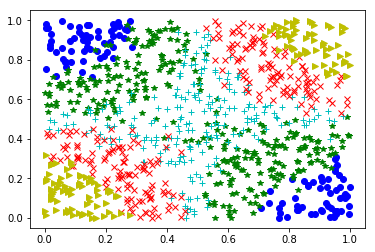

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

data = np.genfromtxt('testData.txt', delimiter=';')
features = data[:,0:2]
labels = data[:,-1:].ravel()

K = np.unique(labels).size

plt.clf() 
lineStyle= ['ob', '*g', '+c', 'xr', '>y']
for cls in range(K):
    idx = (labels == cls+1)
    plt.plot(features[np.nonzero(idx)[0],0], features[np.nonzero(idx)[0],1], lineStyle[cls])
    
#Divide in Train and Test Set: GridSearch already performs cross-validations with our train data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

print('Support Vector Machine')
#Parameter to be tested
parameters = {'kernel':['rbf'], 'gamma':[0.5, 1, 2], 'C':[0.25, 0.5, 1, 2, 4, 8]}
svc = SVC()
#Cross validation folds = 3, classifier is a Support Vector Machine
#GridSearch will perform a set of for cycles to evaluate the best parameters
clf = GridSearchCV(svc, parameters,cv=3)
clf.fit(X_train, y_train)
print("The selected optimal set of parameters {C, gamma} was: ", clf.best_params_)
#print("Cross Validation results obtained: ", clf.cv_results_)
print("The estimated performance for the chosen parameterization was: ", clf.best_score_)

#Test on Test Set
y_pred = clf.predict(X_test)
aux = (y_pred!=y_test)
aux = np.sum(aux.astype(float), 0)
misclassificationRate = aux/labels.size
print ("Mislassification Rate, on the test set was: ", misclassificationRate)